## Set up XLA

In [ ]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [ ]:
VERSION = "nightly"  #@param ["1.5" , "20200516", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4139  100  4139    0     0  55932      0 --:--:-- --:--:-- --:--:-- 55932
Updating TPU and VM. This may take around 2 minutes.
Updating TPU runtime to pytorch-nightly ...
     |████████████████████████████████| 61kB 2.8MB/s 
Uninstalling torch-1.5.1+cu101:
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12
Done updating TPU runtime
  Successfully uninstalled torch-1.5.1+cu101
Uninstalling torchvision-0.6.1+cu101:
  Successfully uninstalled torchvision-0.6.1+cu101
Copying gs://tpu-pytorch/wheels/torch-nightly-cp36-cp36m-linux_x86_64.whl...
- [1 files][107.4 MiB/107.4 MiB]                                                
Operation completed over 1 objects/107.4 MiB.                                    
Copy

In [ ]:
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl
import torch_xla.distributed.xla_multiprocessing as xmp

## Core

In [ ]:
# https://www.kaggle.com/greatgamedota/timm-package
url = "'https://storage.googleapis.com/kagglesdsdata/datasets%2F648967%2F1149246%2Ftimm-0.1.26-py3-none-any.whl?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594110860&Signature=qDqkgQWBMsgHKPDkoWAH8NDsxQLJWo86lY8sp%2BWKqKs%2FPiDKb939Sa6%2BUXFa2MNFXdLbReKpUEZmuFj3B8%2FWLiqPaveVYhC4KZ%2FbyWIZcONGCuxv5gVs2aIdR6N1yHyxYVmiqFc2fR%2Fmkm76NXmyvfWZskj3FhT9%2FltolVOA7adOK79Y6dH%2FlqipLZLB1f6pZdDgi1vtGer6lKnnplliF3K8xhBOoPg1vNKUDvIWFgBW2vCcNLi3nciK2xoKIu5OCfIkVtutxTJ7%2BnRvlweUAYdGCc6NTpNLXNV6CZiBSRgq0rIR7VRh5ZLPqt90BJtHvVbTVe9sb0bZsSvL8lA2qg%3D%3D'"
!wget -q {url} -O 'timm-0.1.26-py3-none-any.whl'

In [ ]:
#https://www.kaggle.com/kaushal2896/pycocotools
url = "'https://storage.googleapis.com/kagglesdsdata/datasets%2F652413%2F1154184%2Fpycocotools-2.0-cp37-cp37m-linux_x86_64.whl?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594110934&Signature=PrIHprqoJB7okvUOCMxXtctSa0ATw1xvg8jabF%2FGr7MPokk8PjYXW76XIUyMmvekctnqJnWpVJ9uBHB2E0jYeC4kulukilZbpm7MtHx04BnifdxXvE5TyI7vBiwOGZjqCY4ZPu8oVgdDuZXapERvxz8kFk4cY9%2Bi%2FFM6uUiuFU%2FXCefofdkEnpsGo2hS8czDTcAHK4ev5gnMpNi4PSGL2d7psV9yqZqrV%2BEHRF5RXLMwdO%2FKwDPQeiBF4oG77EiwLPLvj01FtLa%2BiQ%2BvEA6pNbHV%2Fpcpv6wP5vwZozOPcXg2iq0q5llwe7gawkBCaam%2BMGJqAFmIWjx636%2F%2FIRlx6A%3D%3D'"
!wget -q {url} -O 'pycocotools-2.0-cp37-cp37m-linux_x86_64.whl'

In [ ]:
!pip install -q --no-deps '/content/timm-0.1.26-py3-none-any.whl' > /dev/null
!pip -q install omegaconf
# !pip install -q --no-deps '/content/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl' > /dev/null

In [ ]:
!git clone --quiet https://github.com/tezike/efficientdet-pytorch.git

In [ ]:
import sys
sys.path.insert(0, "/content/efficientdet-pytorch")

In [ ]:
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet

In [ ]:
url = '"https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d7-f05bf714.pth"'
!wget -q {url}

In [ ]:
!pip install fastcore -q

In [ ]:
from fastcore.foundation import *

In [ ]:
import pathlib

make all PosixPath objects have an `.ls()` method just like in fastai

In [ ]:
@patch
def ls(x:pathlib.PosixPath): return list(x.iterdir())

## Colab_setup

In [ ]:
import os

from pathlib import Path
from google.colab import drive

In [ ]:
def create_path(path):
    if not os.path.isdir(path):
        path.mkdir(parents=True, exist_ok=True)
    return path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = Path('/content/drive/My Drive')
base_path = create_path(root_dir/'kaggle-wheat')
base_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PosixPath('/content/drive/My Drive/kaggle-wheat')

In [ ]:
colab_path = Path('/content')

In [ ]:
data_path = create_path(base_path/'dataset')

In [ ]:
model_path = create_path(base_path/'models')

## Load the data

In [ ]:
# this url expires after a while so generate a new one if it no longer works
# url = "'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19989/1160143/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594110686&Signature=P0KxN9ZqQVmVdSu7ucsHihmMQcAIPC6DXOrOKMqD8dk%2BCmAUcp91SSpx2ii2Fm8NaOzbmVChJVkj5%2FwrY718rAz6cZw98XK90JicfQdJ6zxbnPqryYJwFiTTykGBjlC%2FjHVgTvxRUa7muZXIlGW3Ms1yXeXcGAGSaieBAXoXzKHVCGXi9N8qFIjF83RMdvmEmCNMi8ffJzSu0cG7jJeIWvO%2Fq3JlAXS794TBlRGtktV4ROCrE7meWP09QvGYh5vEfCqmKKRRAR1cvbWqWOINpKTiTXPB1HUUmSJAgNOZK%2FfQ75E9b34uXjRxA7tZN%2BtE8tuagqLdvq2VOpFUHQValQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dglobal-wheat-detection.zip'"

In [ ]:
# data_path_str = "'/content/drive/My Drive/kaggle-wheat/dataset'"

In [ ]:
# run this once to donload the data and save on drive
# !wget -q {url} -O tmp.zip && unzip -q tmp.zip -d {data_path_str} && rm tmp.zip

In [ ]:
# list(data_path.iterdir())
data_path.ls()

[PosixPath('/content/drive/My Drive/kaggle-wheat/dataset/sample_submission.csv'),
 PosixPath('/content/drive/My Drive/kaggle-wheat/dataset/train.csv'),
 PosixPath('/content/drive/My Drive/kaggle-wheat/dataset/test'),
 PosixPath('/content/drive/My Drive/kaggle-wheat/dataset/train')]

## Imports

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os
import gc
import ast
import torch
import time
import shutil
import random
import torchvision

import pandas as pd
import numpy as np
import albumentations as A
import matplotlib as mplt
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pycocotools as COCO

from PIL import Image
from tqdm.notebook import tqdm
from torchvision.models.detection import FasterRCNN
from albumentations.pytorch.transforms import ToTensor
from torch.utils.data import RandomSampler, SequentialSampler
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
colab_path = Path('/content')

## Seeder

In [ ]:
seed = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [ ]:
seed_everything(42)

## EDA

In [ ]:
df = pd.read_csv(data_path/'train.csv')
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [ ]:
# len(list((data_path/'train').iterdir())), len(list((data_path/'test').iterdir()))
len((data_path/'train').ls()), len((data_path/'test').ls())

(3422, 10)

We have 3422 images in our training set and 10 images in the test set

change the bbox strings to a list

In [ ]:
df['bbox'] = df['bbox'].apply(ast.literal_eval)

In [ ]:
len(df.image_id.unique())

3373

In [ ]:
(3422 + 10) - 3373

59

From what we have above, 59 images in the data have not been annotated in the train.csv

We can build out the training and validation sets now. Ensure to group the images and all their bounding boxes in each of the train and valid sets

In [ ]:
# image_ids = df.image_id.unique()
# image_len = len(image_ids)
# valid_size = int(0.2 * image_len); #674
# train_image_ids = image_ids[:-valid_size]
# valid_image_ids = image_ids[valid_size:]

In [ ]:
# train = df.loc[df.image_id.isin(train_image_ids)]
# valid = df.loc[~df.image_id.isin(train_image_ids)]
# len(train), len(valid)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

df_folds = df.copy()
df_folds.loc[:, 'bbox_count'] = 1
df_folds = df_folds.groupby('image_id').count()
df_folds.loc[:, 'source'] = df[['image_id', 'source']].groupby('image_id').min()['source']
df_folds.loc[:, 'stratify_group'] = np.char.add(
    df_folds['source'].values.astype(str),
    df_folds['bbox_count'].apply(lambda x: f'_{x // 15}').values.astype(str)
)
df_folds.loc[:, 'fold'] = -1

for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.index, y=df_folds['stratify_group'])):
# for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.image_id, y=df_folds.image_id)):
    df_folds.loc[df_folds.iloc[val_index].index, 'fold'] = fold_number

df_folds = df_folds.reset_index()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# device = xm.xla_device()

Pytorch Dataset

In [ ]:
class WheatDataset(torch.utils.data.Dataset):
    def __init__(self, root, df, df_folds, transforms=None, test=False):
        self.transforms, self.root, self.df = transforms, root, df
        self.test = test
        self.uimages = df_folds.image_id.unique()

    def __getitem__(self, idx):
        image_id = self.uimages[idx]

        if not self.test:
            img_path = self.root/f'train/{image_id}.jpg'
        
            img = Image.open(img_path).convert('RGB')

            img = np.array(img)

            # extract all the bounding boxes for selected image and stack them up 
            # vertically
            bboxes = np.vstack(self.df.loc[self.df.image_id == image_id]['bbox'].apply(lambda x: list(map(int, x))).values)

            # bounding boxes have style [xmin, ymin, width, height] we want to 
            # change to style [xmin, ymin, xmin+width, ymin+height]
            bboxes[:, 2] = bboxes[:, 0] + bboxes[:, 2]
            bboxes[:, 3] = bboxes[:, 1] + bboxes[:, 3]
            # we need to get the area of each bounding box
            bbox_area = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
            
            # convert the bboxes_area to tensors
            bbox_area = torch.tensor(bbox_area)

            # # the pytorch model expects the annotation of images passed into 
            # # the model to be a dict with keys: boxes, labels, masks(optional), image_id, 
            # # area, iscrowd so we have to prepare all those keys

            # # we have only one label which is wheat
            labels = torch.ones((len(bbox_area), ), dtype=torch.int64)
            
            # for the iscrowd, make it a tensor of zeros (we don't need it)
            iscrowd = torch.zeros((len(bbox_area), ))

            # stolen from https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
            targets = {}
            # effdet uses keys 'bbox', 'cls'
            # targets['image_ids'] = image_id
            targets['bbox'] = bboxes
            targets['cls'] = labels

            if self.transforms is not None:
                sample = {
                    'image': img,
                    'bboxes': targets['bbox'],
                    'labels': targets['cls']
                }
                sample = self.transforms(**sample)
                img = sample['image']

                # ensure there is a bbox
                if len(sample['bboxes']) > 0:
                    targets['bbox'] = torch.tensor(sample['bboxes'], dtype=torch.float32).to(device)
            
            # print(targets['cls'].clone().numpy())
            # change the labels to a float (not sure why but i did it to make things work)
            targets['cls'] = torch.tensor(targets['cls'].clone().numpy(), dtype=torch.float32).to(device)
            targets['img_size'] = torch.tensor((img.shape[1], img.shape[2])).to(device)
            return img, targets, image_id

        else:
            img_path = self.root/f'test/{image_id}.jpg'
            img = Image.open(img_path).convert('RGB')
            img = np.array(img)
            if self.transforms is not None:
                sample = {
                    'image': img,
                }
                sample = self.transforms(**sample)
                img = sample['image']
            return img, image_id




    def __len__(self):
        return len(self.uimages)

In [ ]:
# dset = WheatDataset(data_path, df, df_folds, get_train_transforms())

In [ ]:
# len(dset), dset[0]

## Transforms

Using the Albumentations library, we can do some transforms!

In [ ]:
def get_train_transforms(size=512//2):
    transforms = []
    transforms.append(A.OneOf([A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, val_shift_limit=0.2, p=0.9),
                                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.9)],p=0.9))
    transforms.append(A.ToGray(p=0.01))
    transforms.append(A.HorizontalFlip(p=0.5))
    transforms.append(A.VerticalFlip(p=0.5))
    transforms.append(A.Resize(height=size, width=size, p=1))
    transforms.append(A.Resize(height=size, width=size, p=1))
    transforms.append(A.Cutout(num_holes=8, max_h_size=64, max_w_size=64, p=0.5),)
    transforms.append(ToTensor())
    bbox_params = {'format': 'pascal_voc', 'label_fields': ['labels']}

    # https://albumentations.readthedocs.io/en/latest/api/core.html#albumentations.core.composition.BboxParams
    return A.Compose(transforms, bbox_params=bbox_params)

def get_valid_transforms(size=512//2):
    transforms = []
    transforms.append(A.Resize(height=size, width=size, p=1))
    transforms.append(ToTensor())
    # transforms.append(ToTensor(A.Flip(p=0.5)))
    bbox_params = {'format': 'pascal_voc', 'label_fields': ['labels']}

    # https://albumentations.readthedocs.io/en/latest/api/core.html#albumentations.core.composition.BboxParams
    return A.Compose(transforms, bbox_params=bbox_params)

## Model

We will be using a pretrained resnet50 feature pyramind network(FPN) feature map extractor

In [ ]:
#TODO: change the norm kwargs and see how it affects

def eff_det(image_size = 512/2, num_classes=1):
    # https://www.kaggle.com/shonenkov/training-efficientdet

    # we'll be using d7 configs because that is the weight we downloaded
    config = get_efficientdet_config('tf_efficientdet_d7')

    model = EfficientDet(config, pretrained_backbone=False)

    # load the pretrained model
    checkpoint = torch.load('/content/tf_efficientdet_d7-f05bf714.pth')
    model.load_state_dict(checkpoint)
    print('State dict loaded successfully')

    # edit config to suit needs
    config.num_classes = num_classes #wheat # + background
    config.image_size = image_size

    # change the head of the model
    model.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=None)

    # return the detector model (combine the label detector and the box detector)
    return DetBenchTrain(model, config)

In [ ]:
# eff_det()

In [ ]:
# pytorch tutorial
def collate_fn(batch):
    # zip up the x and y batches
    return tuple(zip(*batch))

## Show image

Mkae a dummy datasets

In [ ]:
train_dataset = WheatDataset(data_path, df, df_folds, get_train_transforms())
# valid_dataset = WheatDataset(data_path, valid, get_valid_transforms())

Then the dataloader

In [ ]:
bs = 4

In [ ]:
train_dl = torch.utils.data.DataLoader(train_dataset, 
                                       batch_size=bs, 
                                    #    can use either shuffle or a randsampler
                                    #    shuffle=True, 
                                       sampler = RandomSampler(train_dataset),
                                       collate_fn=collate_fn)

# valid_dl = torch.utils.data.DataLoader(valid_dataset, 
#                                        batch_size=bs, 
#                                     #    shuffle=False,
#                                        sampler = SequentialSampler(valid_dataset), 
#                                        collate_fn=collate_fn)

Test the dataloader

In [ ]:
xb, yb, imidb = next(iter(train_dl))

Let's view something from our dataset

In [ ]:
# everything has been converted to tensors by the transform so we can put them on the device
images = [img.to(device) for img in xb]
# targets = [{k: v.to(device) for k, v in target.items()} for target in yb]
targets = yb

Show an image with it's bboxes

In [ ]:
img = images[1].cpu()
bboxes = targets[1]['bbox'].cpu()

In [ ]:
def _draw_outline(o, lw:int):
    "Outline bounding box onto image `Patch`."
    o.set_path_effects([mplt.patheffects.Stroke(
        linewidth=lw, foreground='black'), mplt.patheffects.Normal()])

def draw_rect(ax, b, color='white', text=None, text_size=14):
    "Draw bounding box on `ax`."
    hw = np.array(b[2:]) - np.array(b[:2])
    patch = ax.add_patch(mplt.patches.Rectangle(b[:2], *hw, fill=False, edgecolor=color, lw=1))
    _draw_outline(patch, 4)
    if text is not None:
        patch = ax.text(*b[:2], text, verticalalignment='top', color=color, fontsize=text_size)
        _draw_outline(patch,1)

In [ ]:
def show_image(img, bboxes=None, ctx=None):
    if ctx is None:
        _, ax = plt.subplots(1, 1, figsize=(16, 8))

    if img.shape[0] == 3:
        img = img.permute(1, 2, 0)
    ax.imshow(img)

    for bbox in bboxes:
        draw_rect(ax, bbox)

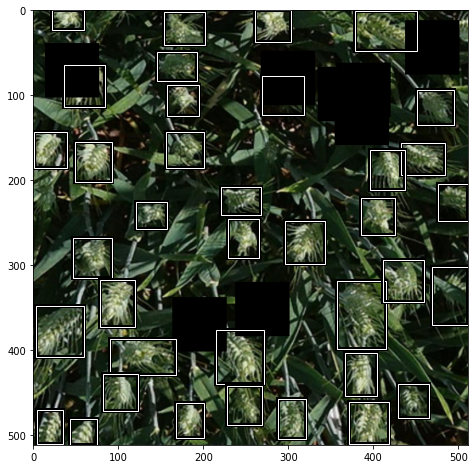

In [ ]:
show_image(img, bboxes)

## Utils

In [ ]:
def reorder_targets(key, yb):
    key_list = []
    for y in yb:
        for k, v in y.items():
            if k == key:
                # delete:  key_list.append(torch.tensor(v, dtype=torch.float32).to(device))
                key_list.append(v)
    return key_list

In [ ]:
# https://pytorch.org/tutorials/beginner/saving_loading_models.html
def save_model(path, model):
    model.eval()
    torch.save(model.state_dict(), path)
    # xm.save(model.state_dict(), path)
    
def load_model(path, model):
    checkpoint = torch.load(path)
    return model.load_state_dict(checkpoint)

In [ ]:
# https://github.com/pytorch/examples/blob/master/imagenet/main.py
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

## Training

In [ ]:
WRAPPED_MODEL = eff_det(512/2)
def run(fold):
    print(f'Setting up...')
    # device = ice()
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    global WRAPPED_MODEL
    model = WRAPPED_MODEL.to(device)

    bs = 4

    train_ = df_folds.query(f'fold != {1}').reset_index(drop=True)
    valid_ = df_folds.query(f'fold == {1}').reset_index(drop=True)

    train_ds = WheatDataset(data_path, df, train_, get_train_transforms())
    valid_ds = WheatDataset(data_path, df, valid_, get_valid_transforms())

    # train_sampler = torch.utils.data.distributed.DistributedSampler(train_ds, 
    #                                                                 num_replicas=ld_size(),
    #                                                                 rank=inal(),
    #                                                                 shuffle=True)

    train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=bs,
                                       drop_last = True,
                                       num_workers=0,
                                    #    sampler = train_sampler,
                                       collate_fn=collate_fn)

    # valid_sampler = torch.utils.data.distributed.DistributedSampler(valid_ds, 
    #                                                                 num_replicas=ld_size(),
    #                                                                 rank=inal(),
    #                                                                 shuffle=False)

    valid_dl = torch.utils.data.DataLoader(valid_ds, 
                                        batch_size=bs,
                                        drop_last = False,
                                        num_workers=0,
                                        # sampler = valid_sampler,
                                        collate_fn=collate_fn)

    def train_model(train_dl, model, optimizer):
        print('Training...')
        loss_history = AverageMeter()

        # put model in train mode
        model.train()

        p_bar = tqdm(train_dl, total=len(train_dl))

        for i, (xb, yb, image_ids) in enumerate(p_bar):

            images = torch.stack(xb)
            images = images.to(device)

            targets = dict()
            targets['bbox'] = reorder_targets('bbox', yb)
            targets['cls'] = reorder_targets('cls', yb)

            optimizer.zero_grad()

            # the putput of the model is a dict with keys: 
            # ['loss', 'class_loss', 'box_loss', 'detections']
            # print('Beofr')
            loss_dict = model(images, targets)
            # print('after')

            # loss  = sum(loss for loss in loss_dict.values())
            loss = loss_dict['loss']
            loss_value = loss.detach().item()

            # send the loss value for that minibatch to the meter, the average of 
            # all the losses in each of the minibatches will be gotten by calling 
            # `.value` on Average meter 
            loss_history.update(loss_value, images.shape[0])

            loss.backward()
            # er_step(optimizer)
            optimizer.step()

            if i % 1000 == 0:
                print(f"train_loss #{i} train_loss: {loss_history.avg}")

            p_bar.set_postfix(loss=loss_history.avg)

            # break

        # return loss_history


    def evaluate_model(valid_dl, model, optimizer):
        print('Evaluating...')
        loss_history = AverageMeter()

        # put model in eval mode
        model.eval()

        # DO NOT TRACK COMPUTATIONS DURING EVAL MODE BECAUSE THEIR IS NO OPTIMIZATION
        with torch.no_grad():
            p_bar = tqdm(valid_dl, total=len(valid_dl))

            for i, (xb, yb, image_ids) in enumerate(p_bar):
                gc.collect()

                images = torch.stack(xb)
                images = images.to(device)

                targets = dict()
                targets['bbox'] = reorder_targets('bbox', yb)
                targets['cls'] = reorder_targets('cls', yb)

                # the putput of the model is a dict with keys: 
                # ['loss', 'class_loss', 'box_loss', 'detections']
                # testing model on valid data
                loss_dict = model(images, targets)

                loss = loss_dict['loss']
                loss_value = loss.detach().item()

                # send the loss value for that minibatch to the meter, the average of 
                # all the losses in each of the minibatches will be gotten by calling 
                # `.value` on Average meter 
                loss_history.update(loss_value, images.shape[0])

                if i % 1000 == 0:
                    print(f"val_loss #{i} valid_loss: {loss_history.avg}")
                
                p_bar.set_postfix(loss = loss_history.avg)
                # break

        return loss_history



    lr = 2e-04
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.0005)
    # whenever there is an increase in minimum loss being tracked for a single 
    # epoch(one more epoch must run), reduce the lr by a factor which is set. 
    # An eps is set by default that the learning rate won't be able to cross no 
    # matter the decrease

    # https://discuss.pytorch.org/t/reducelronplateau-not-doing-anything/24575/6
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                            factor=0.5, #multiplier
                                                          patience=1,
                                                        #   this just increases precision of new lr
                                                          threshold_mode='abs' 
                                                          )


    num_epochs = 10
    best_val_loss = float('inf')

    for epoch in range(num_epochs):

        # train_para_loader = pl.ParallelLoader(train_dl, [device])
        # valid_para_loader = pl.ParallelLoader(valid_dl, [device])

        epoch_start = time.time()

        start = time.time()
        train_model(train_dl, model, optimizer)
        # train_model(train_para_loader.per_device_loader(device), model, optimizer)
        end = time.time()

        print(f'Training Time: {round(end - start, 2)} secs')

        start = time.time()
        val_loss = evaluate_model(valid_dl, model, optimizer)
        # val_loss = evaluate_model(valid_para_loader.per_device_loader(device), model, optimizer)
        end = time.time()

        print(f'Evaluation time: {round(end-start, 2)} secs \n')


        # save the model whenever we have a good(low) loss (Early stopping)
        if val_loss.avg < best_val_loss:
            print(f'Validation Loss decreased from {best_val_loss} --> {val_loss.avg}  Saving Model!')
            save_model(model_path/f'best_loss_epoch#{fold}.pth', model)
            best_val_loss = val_loss.avg

        # run the lerning rate scheduler to anneal learning rate
        scheduler.step(metrics=val_loss.avg)

        epoch_end = time.time()

        print('-'*50)
        print(f'TOTAL EPOCH TIME: {round(epoch_end-epoch_start, 2)} secs \n')
        # break

State dict loaded successfully


In [ ]:
gc.collect()

22689

In [ ]:
run(0)

Setting up...
Training...


train_loss #0 train_loss: 21.70589828491211

Training Time: 833.31 secs
Evaluating...


val_loss #0 valid_loss: 1.1817978620529175

Evaluation time: 81.0 secs 

Validation Loss decreased from inf --> 1.2276147452107182  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 919.9 secs 

Training...


train_loss #0 train_loss: 1.2149873971939087

Training Time: 836.27 secs
Evaluating...


val_loss #0 valid_loss: 1.0037070512771606

Evaluation time: 80.74 secs 

Validation Loss decreased from 1.2276147452107182 --> 1.0937789860478153  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 918.28 secs 

Training...


train_loss #0 train_loss: 1.162860631942749

Training Time: 836.83 secs
Evaluating...


val_loss #0 valid_loss: 0.8854259252548218

Evaluation time: 81.73 secs 

Validation Loss decreased from 1.0937789860478153 --> 0.9816834015316434  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 919.79 secs 

Training...


train_loss #0 train_loss: 1.0179837942123413

Training Time: 837.05 secs
Evaluating...


val_loss #0 valid_loss: 0.7804503440856934

Evaluation time: 81.57 secs 

Validation Loss decreased from 0.9816834015316434 --> 0.9361928402936017  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 919.79 secs 

Training...


train_loss #0 train_loss: 0.929245114326477

Training Time: 833.12 secs
Evaluating...


val_loss #0 valid_loss: 0.7510267496109009

Evaluation time: 83.0 secs 

Validation Loss decreased from 0.9361928402936017 --> 0.8650558524661593  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 917.32 secs 

Training...


train_loss #0 train_loss: 0.8565713167190552

Training Time: 834.81 secs
Evaluating...


val_loss #0 valid_loss: 0.7350767850875854

Evaluation time: 81.29 secs 

Validation Loss decreased from 0.8650558524661593 --> 0.8432447698381212  Saving Model!
--------------------------------------------------
TOTAL EPOCH TIME: 917.37 secs 

Training...


train_loss #0 train_loss: 0.8814697265625


In [ ]:
%time
best_summary_val_loss = float('inf')

for epoch in range(num_epochs):

    ## summary_loss = train_model()
    train_model(train_dl, model, optimizer)

    summary_val_loss = evaluate_model(valid_dl, model, optimizer)

    # save model after every epoch
    save_model(model_path/f'loss_epoch_#{epoch}.pth')

    # save the model whenever we have a good(low) loss (Early stopping)
    if summary_val_loss.avg < best_summary_val_loss:
        best_summary_val_loss = summary_val_loss.avg

        # TODO: Delete previous bests

        save_model(model_path/f'best_loss_epoch#{epoch}.pth')

    # run the lerning rate scheduler to anneal learning rate
    scheduler.step(metrics=summary_val_loss.avg)

    print(f"Epoch #{epoch} loss: {summary_val_loss.avg}") 

## Inference

In [ ]:
model.eval()
# # all evaluation will be done on the cpu!!
cpu_device = torch.device('cpu')

output = model(images)

output = [{k: v.to(cpu_device) for k, v in output.items()} for output in yb]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


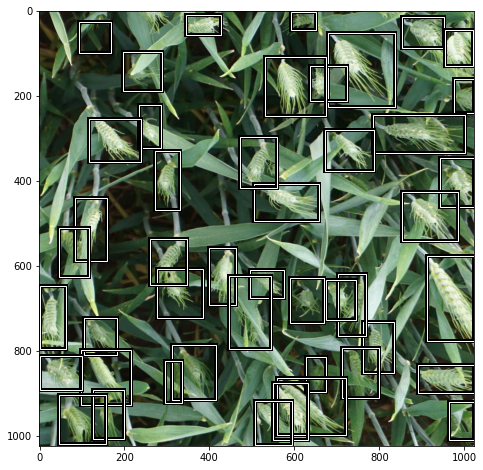

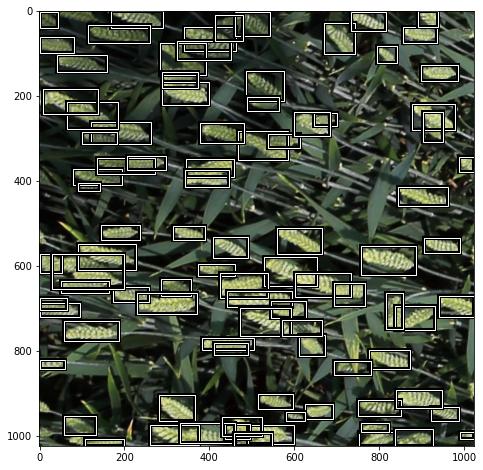

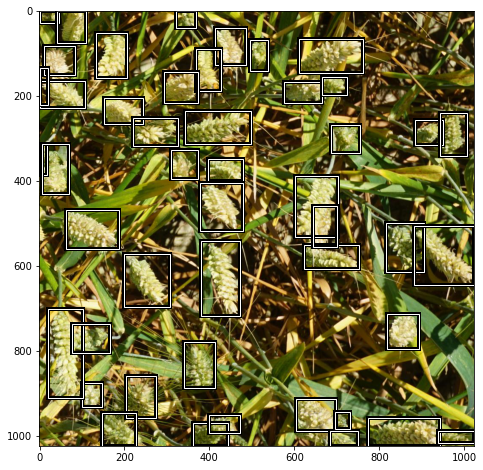

In [ ]:
for i in range(3):
    show_image(images[i].to(cpu_device), output[i]['boxes'])
    # break

Looks alright, so i save the weight

In [ ]:
torch.save(model.state_dict(), model_path/'fasterrcnn_resnet50_fpn.pth')

In [ ]:
model_path.ls()

[PosixPath('/content/drive/My Drive/kaggle-wheat/models/fasterrcnn_resnet50_fpn.pth')]